In [46]:
#Imports
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [47]:
# 1 Data Collection

# Fetches S&P 500 data, auto sale, and 10-year treasury data
sp500_data = yf.download('SPY', start='2004-01-26', end='2024-01-26')
autosales_data = pd.read_csv(r'C:\Users\harri\downloads\TOTALSA_Updated.csv')
treasury_data = pd.read_csv(r'C:\Users\harri\downloads\DGS1.csv')
print(autosales_data)
# sp500_data.plot(figsize=(10, 10))
# autosales_data.plot(figsize=(10, 10))
# plt.show()

C:\Users\harri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

           DATE  TOTALSA  MoM_%_Change
0    2004-01-01   16.695           NaN
1    2004-02-01   17.032      2.018568
2    2004-03-01   17.247      1.262330
3    2004-04-01   16.898     -2.023540
4    2004-05-01   18.186      7.622204
..          ...      ...           ...
235  2023-08-01   15.841     -3.696273
236  2023-09-01   16.272      2.720788
237  2023-10-01   15.940     -2.040315
238  2023-11-01   15.870     -0.439147
239  2023-12-01   16.352      3.037177

[240 rows x 3 columns]


Number of shares owned: 1265.33
Return Profit 617519.0
Percent Return: 517.52
Profit return per year: 26


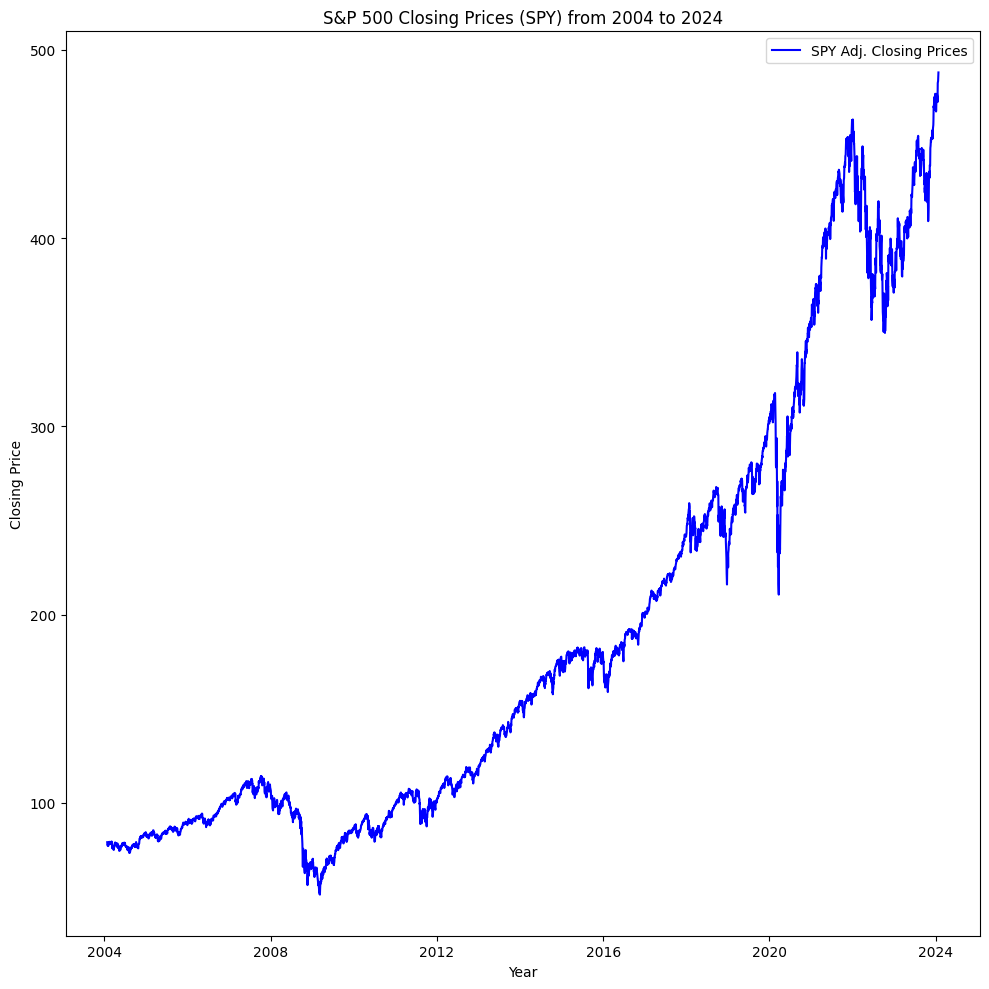

In [48]:
#2 Benchmark Establishment
#determine how much snp500 has made us

#get close price of first day
close_price = sp500_data['Adj Close']
num_shares_owned = 100000/close_price['2004-01-26']
num_shares_owned = round(num_shares_owned, 2)
print("Number of shares owned: " + str(round(num_shares_owned, 2)))

#get amount of money made
returns_profit = num_shares_owned * close_price['2024-01-25']
returns_profit = round(returns_profit,2)
print("Return Profit " + str(returns_profit))

#simple return formula, amount of return
SRF = ((close_price['2024-01-25'] - close_price['2004-01-26']) / close_price['2004-01-26'])*100
SRF = round(SRF,2)
print("Percent Return: " + str(SRF))
SRF_per_year = round(SRF/20)
print("Profit return per year: " + str(SRF_per_year))

#graph of sp500
plt.figure(figsize=(10, 10))
plt.plot(close_price, label='SPY Adj. Closing Prices', color='blue')
plt.title('S&P 500 Closing Prices (SPY) from 2004 to 2024')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [61]:
# Strategy Implementation

#Initial Portfolio Setup
initial_investment = 100000
allocation_to_spy = 0.60
allocation_to_treasury = 0.40

spy_value = initial_investment * allocation_to_spy
treasury_value = initial_investment * allocation_to_treasury

bond_portfolio = []
bond_purchase_date = []

stock_portfolio = []  # Corrected spelling
stock_purchase_dates = []

stock_holding = (initial_investment * allocation_to_spy) / 200  # replace 200 with actual close_price
stock_holding = round(stock_holding, 2)
stock_portfolio.append(stock_holding)

bond_holding = initial_investment * allocation_to_treasury
bond_portfolio.append(bond_holding)

initial_date = '2004-01-26'
stock_purchase_dates.append(initial_date)
bond_purchase_date.append(initial_date)

for index, row in autosales_data.iterrows():
    if row['MoM_%_Change'] <= -5:
        # Add to your purchase dates if part of your strategy
        bond_purchase_date.append(row['DATE'])

print("Stock Purchase Dates:", stock_purchase_dates)
print("Bond Purchase Dates:", bond_purchase_date)



Stock Purchase Dates: ['2004-01-26']
Bond Purchase Dates: ['2004-01-26', '2004-06-01', '2005-01-01', '2005-08-01', '2005-10-01', '2006-02-01', '2006-08-01', '2008-07-01', '2008-09-01', '2008-10-01', '2009-01-01', '2009-02-01', '2009-09-01', '2010-02-01', '2011-05-01', '2019-01-01', '2020-03-01', '2020-04-01', '2021-05-01', '2021-06-01', '2021-08-01', '2021-09-01', '2022-05-01']
